In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Creating dataset

In [6]:
def create_dataset():
    x0 = np.random.normal(size=50).reshape(-1,2) - 1
    x1 = np.random.normal(size = 50).reshape(-1,2) + 1
    return np.concatenate([x0,x1]), np.concatenate([np.zeros(25),np.ones(25)])

In [7]:
X,y = create_dataset()

In [8]:
assert X.shape[0] == y.shape[0]

In [9]:
X = np.column_stack((np.ones(X.shape[0]),X))

## Train Test split

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

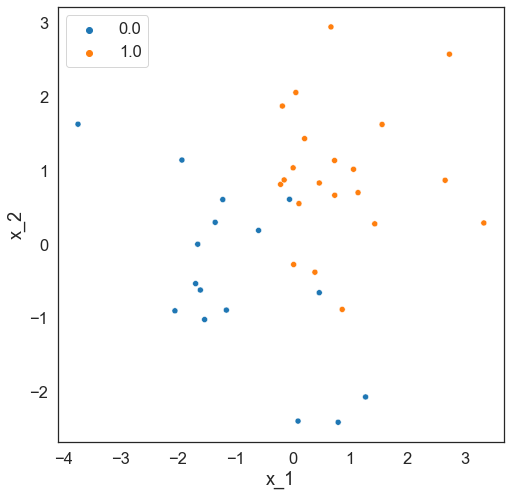

In [11]:
sns.set_style('white')
f = plt.figure(figsize=(8,8))
sns.set_context("notebook",font_scale=1.5,rc={'lines.linewidth':2.5})

sns.scatterplot(data=X_train,x = X_train[:,-2],y = X_train[:,-1],hue=y_train)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

## Logistic Regression class

In [12]:
class LogisticRegression():
    
    def set_weight_vector(self,w):
        self.w = w
        
    def linear_combination(self,X:np.ndarray) -> np.ndarray:
        return X @ self.w
    
    def sigmoid(self,z:np.ndarray) -> np.ndarray:
        return 1/(1 + np.exp(-z))
    
    def activation(self,X:np.ndarray) -> np.ndarray:
        return self.sigmoid(self.linear_combination(X))
    
    def predict(self,X:np.ndarray,threshold:float = 0.5):
        return (self.activation(X) > threshold).astype(int)
    
    def loss(self,X:np.ndarray,y:np.ndarray,reg_rate:float) -> float:
        e1 = y@np.log(self.activation(X))
        e2 = (1-y)@np.log(1 - self.activation(X))
        reg_err = reg_rate*(np.transpose(self.w)@self.w)
        
        return -1*(e1 + e2) + reg_err
    
    def calculate_gradient(self,X:np.ndarray,y:np.ndarray,reg_rate:float) -> np.ndarray:
        return np.transpose(X)@(self.activation(X) - y) + reg_rate*self.w 
    
    def update_weights(self,lr:float,grad:np.ndarray) -> np.ndarray:
        return (self.w - lr*grad)
    
    def gradient_descent(self,X:np.ndarray,y:np.ndarray,num_epochs:int,reg_rate:float,lr:float) -> np.ndarray:
        self.w = np.zeros(X.shape[1])
        self.errors = []
        self.weights = []
        for i in np.arange(num_epochs):
            self.weights.append(self.w)
            dJdw = self.calculate_gradient(X,y,reg_rate)
            self.w = self.update_weights(lr,dJdw)
            self.errors.append(self.loss(X,y,reg_rate))
        return self.w

In [13]:
log_reg = LogisticRegression()

## Learning Curves

In [11]:
def plot_learning_curves(err):
    plt.plot(np.arange(len(err)),err,'r-')
    plt.xlabel("Iter#")
    plt.ylabel("$\mathbf{J(w)}$")

In [12]:
log_reg.gradient_descent(X_train,y_train,1000,0,0.01)

array([0.84208276, 2.02259197, 2.33605608])

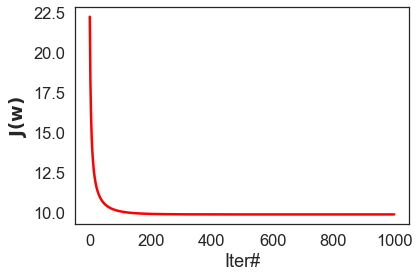

In [13]:
plot_learning_curves(log_reg.errors)

In [14]:
y_hat = log_reg.predict(X_test)

In [15]:
assert y_hat.shape == y_test.shape

In [16]:
np.column_stack([y_hat,y_test])

array([[1., 1.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 1.],
       [1., 1.],
       [0., 0.]])

## Non-linearly seperable model

In [34]:
from sklearn.datasets import make_circles
feature_matrix, label_vector = make_circles()

In [35]:
assert feature_matrix.shape[0] == label_vector.shape[0]

In [36]:
import itertools
import functools

def get_combinations(x,degree):
    return itertools.combinations_with_replacement(x,degree)


def compute_new_features(items):
    return functools.reduce(lambda x,y: x*y,items)

In [37]:
import numpy as np
import functools
import itertools

def polynomail_transform(x,degree,logging=False):
    x = np.array(x)
    if x.ndim == 1:
        x = x[:,None] # If the input is of one dimension then this converts it into a featrue matrix
    x_t = np.transpose(x)
    features = [np.ones(len(x))]
    
    if logging:
        print("Input:",x)
    for degree in range(1,degree+1):
        for items in get_combinations(x_t,degree):
            features.append(compute_new_features(items))
            if logging:
                print(items,':',compute_new_features(items) )
    if logging:
        print(np.asarray(features).transpose())
    return np.asarray(features).transpose()

In [38]:
x_poly = polynomail_transform(feature_matrix,degree=2)

In [39]:
print(f'Features before transformation: {feature_matrix.shape[1]}')
print(f'Features after transformation: {x_poly.shape[1]}')

Features before transformation: 2
Features after transformation: 6


In [40]:
x_train,x_test,y_train,y_test = train_test_split(x_poly,label_vector)

In [41]:
assert x_train.shape[0] == y_train.shape[0]
assert x_test.shape[0] == y_test.shape[0]

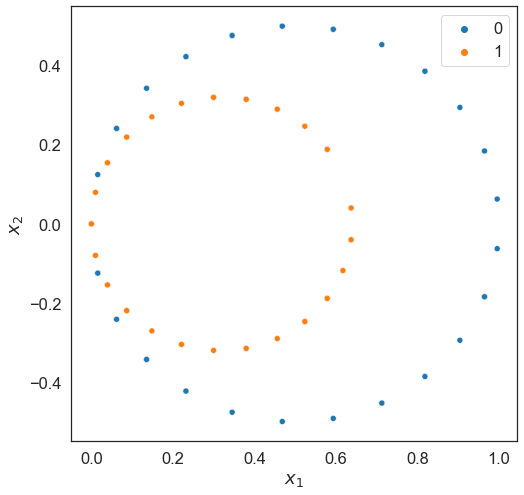

In [42]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=x_train,x = x_train[:,-1],y = x_train[:,-2],hue=y_train)
plt.xlabel("${x_1}$")
plt.ylabel("${x_2}$")
plt.show()

In [43]:
log_reg_poly = LogisticRegression()

In [46]:
log_reg_poly.gradient_descent(x_train,y_train,10000,0,0.01)

array([ 20.30752203,   0.03347575,  -0.13679106, -24.87660844,
        -0.1416683 , -24.75152524])

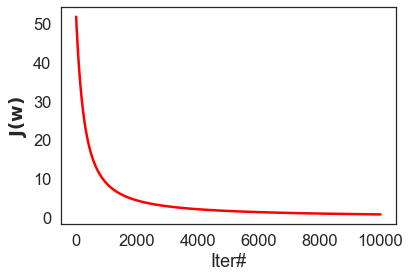

In [47]:
plot_learning_curves(log_reg_poly.errors)

In [49]:
y_test_hat = log_reg_poly.predict(x_test)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_hat,zero_division=0))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



# Logistic Regression Visualization

In [51]:
from matplotlib import cm
from matplotlib.colors import colorConverter,ListedColormap

### Step by Step proccess of visualization
**1.** Generate the grid of weight vectors
**2.** For each point in the grid calculate the crossentropy loss on fixed training set
**3.** Plot countours of weight and loss

In [64]:
log_res_vis = LogisticRegression()

In [65]:
feature_matrix,label_vector = create_dataset()

In [66]:
feature_matrix_bias = polynomail_transform(feature_matrix,degree=1)
x_train,x_test,y_train,y_test = train_test_split(feature_matrix_bias,label_vector)

### Create grid of 25 weights

In [67]:
point_count = 25
w1 = np.linspace(-5,5,num=point_count)
w2 = np.linspace(-5,5,num=point_count)
w1_list, w2_list = np.meshgrid(w1,w2)

### Calculate loss at each grid

In [68]:
loss = np.zeros((point_count,point_count))
for i in range(point_count):
    for j in range(point_count):
        weight_vector = np.array([0,w1_list[i,j],w2_list[i,j]])
        log_res_vis.set_weight_vector(weight_vector)
        loss[i,j] = log_res_vis.loss(x_train,y_train,reg_rate=0)

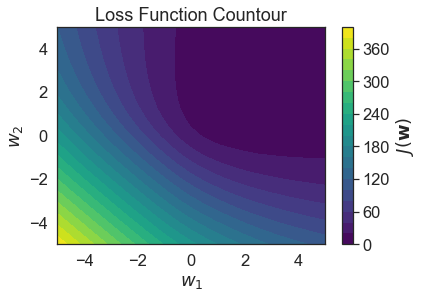

In [71]:
plt.figure(figsize=(6,4))
plt.contourf(w1_list,w2_list,loss,20,cmap = cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel("$J(\mathbf{w})$")
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title("Loss Function Countour")
plt.grid()
plt.show()

In [73]:
log_res_vis.gradient_descent(x_train,y_train,num_epochs=1000,reg_rate=0,lr=0.01)

array([0.82709756, 4.23524864, 4.23367771])

### Gradient Descent Trajectory

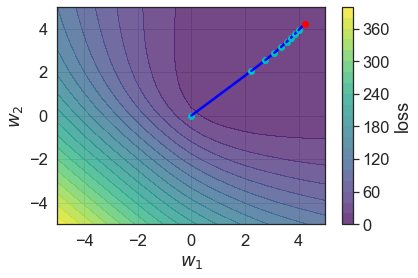

In [88]:
plt.figure(figsize=(6,4))
plt.contourf(w1_list,w2_list,loss,20,alpha = 0.75,cmap = cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel('loss')
plt.xlabel("${w_1}$")
plt.ylabel("${w_2}$")

#Plotting the weights after few epochs
for i in range(1,900,100):
    w1 = log_res_vis.weights[(i - 1)]
    w2 = log_res_vis.weights[(i+100)]
    
    plt.plot(w1[1],w1[2],marker = 'o',color = 'c')
    plt.plot([w1[1],w2[1]],[w1[2],w2[2]],linestyle = '-',color='b')
    
w1 = log_res_vis.weights[-1]
plt.plot(w1[1],w1[2],marker = 'o',color = 'r')

plt.grid()
plt.show()

In [3]:
w = np.array([0.1,0.2,0.3])

In [6]:
np.sqrt(np.dot(w,w))

0.37416573867739417

In [ ]:
X = np.array([])